# Steps:


## Creating a classifier:
Import training data.  

Examine features and transforms.  

Extract features.  

Train classifier.  

Perform feature reduction(?) (See ML project)  

Optimize classifier.  


## Creating a pipeline:
Create tunable window sliding.

Impliment detection pipleine.

Test on various images.

## Tune (wrap) pipeline for video:
Use a class to track vehicle locations from frame to frame.  

Filter out false positives (real cars should only move a built from frame to frame).

## Combine with lane finder


blah blah blahh

## Create a Classifier
### Import Packages and Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


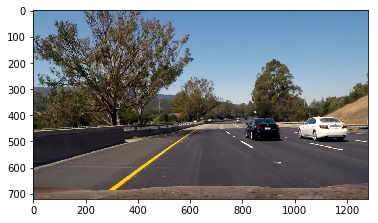

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image = mpimg.imread('test_images/test6.jpg')
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

### Import Training Data

This image is: <class 'numpy.ndarray'> with dimensions: (64, 64, 3)


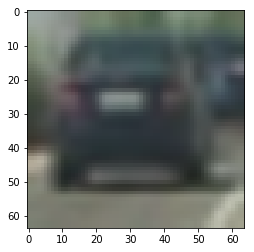

In [23]:
image = cv2.imread('vehicles/GTI_Far/image0000.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: <class 'numpy.float32'>


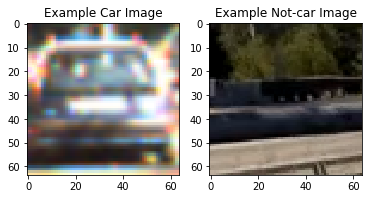

In [31]:
import glob
#from skimage.feature import hog
#from skimage import color, exposure
# images are divided up into vehicles and non-vehicles


cars = []
notcars = []

vehicle_folders = ['GTI_Far','GTI_Left','GTI_MiddleClose','GTI_Right','KITTI_extracted']
for folder in vehicle_folders:
    images = glob.glob('vehicles/'+folder+'/*.png')
    for image in images:
            cars.append(image)

nonvehicle_folders = ['GTI','Extras']
for folder in nonvehicle_folders:
    images = glob.glob('non-vehicles/'+folder+'/*.png')
    for image in images:
            notcars.append(image)


        
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    #print(car_list)
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    car_image = mpimg.imread(cars[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = car_image.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = type(car_image[0][0][0])
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')